In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import datetime
import math
import seaborn as sns

In [17]:
#Following code from https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9

In [18]:
fb_df = pd.read_csv("/Users/basillatif/Desktop/Stock Data Project/fb_data.csv")
fb_df.head()
fb_df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
1471,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0


In [19]:
fb_df.info()
fb_df['Date'] = pd.to_datetime(fb_df['Date'])
fb_df.index = fb_df['Date']
fb_df = fb_df.sort_index()
fb_df.info()
fb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 13 columns):
Date           1472 non-null object
Open           1472 non-null float64
High           1472 non-null float64
Low            1472 non-null float64
Close          1472 non-null float64
Volume         1472 non-null float64
Ex-Dividend    1472 non-null float64
Split Ratio    1472 non-null float64
Adj. Open      1472 non-null float64
Adj. High      1472 non-null float64
Adj. Low       1472 non-null float64
Adj. Close     1472 non-null float64
Adj. Volume    1472 non-null float64
dtypes: float64(12), object(1)
memory usage: 149.6+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2012-05-18 to 2018-03-27
Data columns (total 13 columns):
Date           1472 non-null datetime64[ns]
Open           1472 non-null float64
High           1472 non-null float64
Low            1472 non-null float64
Close          1472 non-null float64
Volume         1472 non-null float64
Ex-D

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
2012-05-18,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [39]:
fb_df.shape

(1472, 15)

In [40]:
fb_df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns
count,1472.000000,1472.000000,1472.000000,1472.000000,1.472000e+03,1472.0,1472.0,1472.000000,1472.000000,1472.000000,1472.000000,1.472000e+03,1471.000000,1471.000000
mean,89.486727,90.402976,88.494512,89.482903,3.719587e+07,0.0,1.0,89.486727,90.402976,88.494512,89.482903,3.719587e+07,89.440274,-0.000678
std,48.507101,48.789958,48.185146,48.536888,3.243733e+07,0.0,0.0,48.507101,48.789958,48.185146,48.536888,3.243733e+07,48.525821,0.022664
min,18.080000,18.270000,17.550000,17.729000,5.913066e+06,0.0,1.0,18.080000,18.270000,17.550000,17.729000,5.913066e+06,17.729000,-0.228441
25%,49.237500,50.202500,48.520000,49.167250,1.835496e+07,0.0,1.0,49.237500,50.202500,48.520000,49.167250,1.835496e+07,49.151500,-0.011744
50%,81.025000,81.895000,80.385000,80.902500,2.718119e+07,0.0,1.0,81.025000,81.895000,80.385000,80.902500,2.718119e+07,80.895000,-0.000891
75%,123.615000,124.715000,122.905000,123.902500,4.585621e+07,0.0,1.0,123.615000,124.715000,122.905000,123.902500,4.585621e+07,123.895000,0.009163
max,192.040000,195.320000,189.980000,193.090000,5.735764e+08,0.0,1.0,192.040000,195.320000,189.980000,193.090000,5.735764e+08,193.090000,0.132462


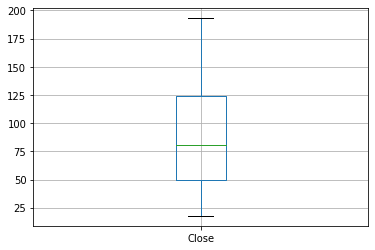

In [20]:
fb_boxplot = fb_df.boxplot(column='Close')

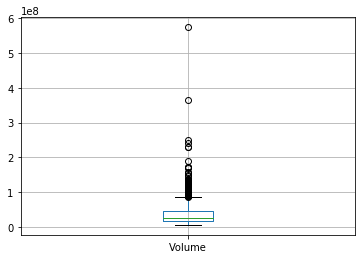

In [21]:
fb_boxplot = fb_df.boxplot(column='Volume')

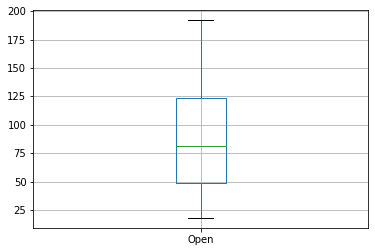

In [37]:
fb_df.boxplot(column = 'Open')

In [22]:
fb_df['Volume'].idxmin()

Timestamp('2015-11-27 00:00:00')

(array([734503., 734869., 735234., 735599., 735964., 736330., 736695.]),
 <a list of 7 Text xticklabel objects>)

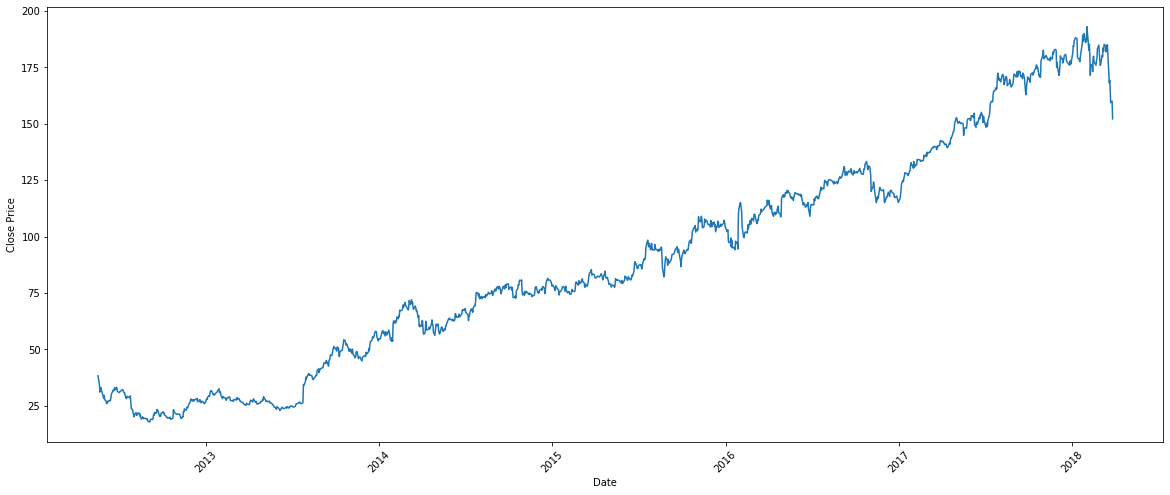

In [23]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close', data=fb_df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [24]:
#Creating a daily lag column 
fb_df['Daily Lag'] = fb_df['Close'].shift(1)
fb_df.head()


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag
Date,,,,,,,,,,,,,,
2012-05-18,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,NaN
2012-05-21,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,38.2318
2012-05-22,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,34.0300
2012-05-23,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,31.0000
2012-05-24,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,32.0000


In [25]:
#Create the daily returns columns
fb_df['Daily Returns'] = (fb_df['Daily Lag']/fb_df['Close']) - 1
fb_df.head()
fb_df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns
Date,,,,,,,,,,,,,,,
2018-03-21,2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0,168.15,-0.007320
2018-03-22,2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0,169.39,0.027291
2018-03-23,2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0,164.89,0.034507
2018-03-26,2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0,159.39,-0.004186
2018-03-27,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0,160.06,0.051712


In [28]:
fb_df['Daily Returns'].idxmax()

Timestamp('2012-07-27 00:00:00')

mean = -0.0006783794115044017
Std deviation = 0.02266433105297585


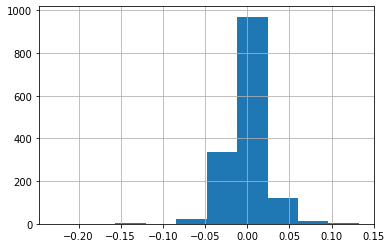

In [58]:
mean = fb_df['Daily Returns'].mean()
std = fb_df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)
fb_df['Daily Returns'].hist()

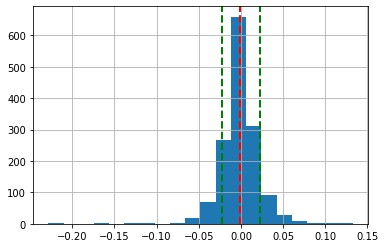

In [59]:
fb_df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [60]:
fb_df['Daily Returns'].kurtosis()
#The kurtosis result shows that the data is highly skewed i.e. > 1

12.60282972690863

In [61]:
#From https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
#Coding the rolling mean 
close_px = fb_df['Close']
print(type(close_px))
mavg = close_px.rolling(window=10).mean()
print(close_px)
print(mavg)

<class 'pandas.core.series.Series'>
Date
2012-05-18     38.2318
2012-05-21     34.0300
2012-05-22     31.0000
2012-05-23     32.0000
2012-05-24     33.0300
                ...   
2018-03-21    169.3900
2018-03-22    164.8900
2018-03-23    159.3900
2018-03-26    160.0600
2018-03-27    152.1900
Name: Close, Length: 1472, dtype: float64
Date
2012-05-18        NaN
2012-05-21        NaN
2012-05-22        NaN
2012-05-23        NaN
2012-05-24        NaN
               ...   
2018-03-21    179.745
2018-03-22    178.000
2018-03-23    175.416
2018-03-26    172.946
2018-03-27    169.977
Name: Close, Length: 1472, dtype: float64


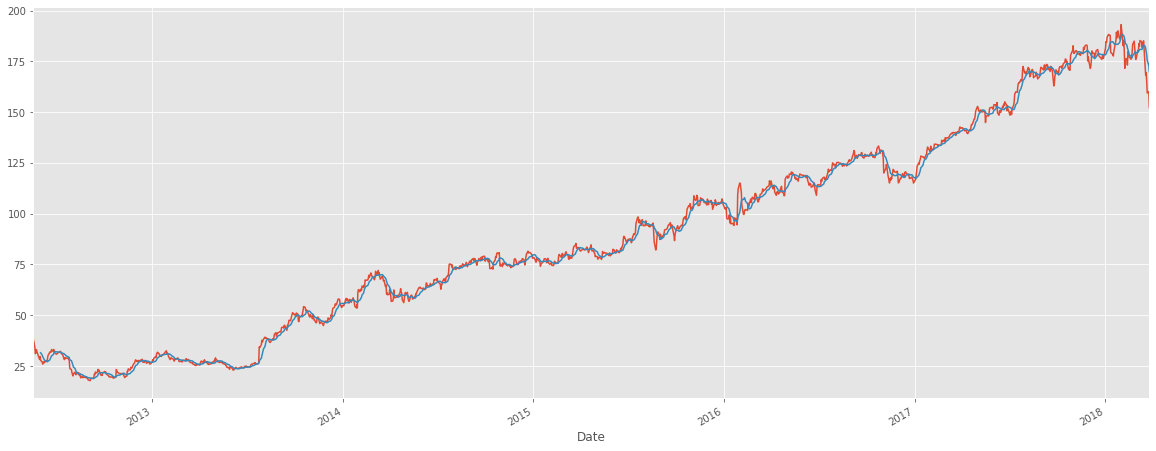

In [62]:
# Adjusting the style of matplotlib
style.use('ggplot')
plt.figure(figsize=(20,8))
close_px.plot(label='FB')
mavg.plot(label='mavg')

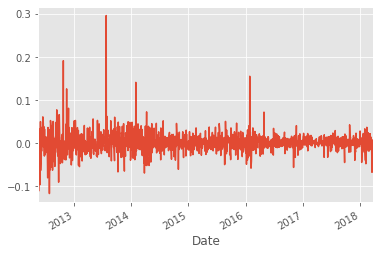

In [74]:
#Calculating return deviation
returns = close_px / close_px.shift(1) - 1
fb_df['Return Deviation'] = returns
fb_df.loc[fb_df['Return Deviation'].idxmax()]
returns.plot(label='return')
#fb_df['Return Deviation'].hist()
#returns.plot(label='return')

In [80]:
fb_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns,Return Deviation
Date,,,,,,,,,,,,,,,,
2012-05-18,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,NaN,NaN,NaN
2012-05-21,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,38.2318,0.123473,-0.109903
2012-05-22,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,34.0300,0.097742,-0.089039
2012-05-23,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,31.0000,-0.031250,0.032258
2012-05-24,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,32.0000,-0.031184,0.032188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0,168.1500,-0.007320,0.007374
2018-03-22,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0,169.3900,0.027291,-0.026566
2018-03-23,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0,164.8900,0.034507,-0.033356


In [31]:
#Model Generation
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [32]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 1, 1)
dfcomp = web.DataReader(['FB'],'yahoo',start=start,end=end)['Adj Close']

In [33]:
dfreg = fb_df.loc[:,['Adj. Close','Volume']]
dfreg['HL_PCT'] = (fb_df['High'] - fb_df['Low']) / fb_df['Close'] * 100.0
dfreg['PCT_change'] = (fb_df['Close'] - fb_df['Open']) / fb_df['Open'] * 100.0
dfreg

,Adj. Close,Volume,HL_PCT,PCT_change
Date,,,,
2012-05-18,38.2318,573576400.0,18.309366,-9.080143
2012-05-21,34.0300,168192700.0,10.755216,-6.843690
2012-05-22,31.0000,101786600.0,8.548387,-4.937136
2012-05-23,32.0000,73600000.0,3.562500,2.008288
2012-05-24,33.0300,50237200.0,4.359673,0.242792
...,...,...,...,...
2018-03-21,169.3900,105350867.0,5.962572,2.785194
2018-03-22,164.8900,73389988.0,3.972345,-0.746403
2018-03-23,159.3900,52306891.0,5.069327,-3.656915


In [106]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj. Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [107]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [44]:
fb_df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns
Date,,,,,,,,,,,,,,,
2012-05-18,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,NaN,NaN
2012-05-21,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,38.2318,0.123473
2012-05-22,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,34.0300,0.097742
2012-05-23,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,31.0000,-0.031250
2012-05-24,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,32.0000,-0.031184


In [47]:
dfreg.head()

,Adj. Close,Volume,HL_PCT,PCT_change
Date,,,,
2012-05-18,38.2318,573576400.0,18.309366,-9.080143
2012-05-21,34.0300,168192700.0,10.755216,-6.843690
2012-05-22,31.0000,101786600.0,8.548387,-4.937136
2012-05-23,32.0000,73600000.0,3.562500,2.008288
2012-05-24,33.0300,50237200.0,4.359673,0.242792


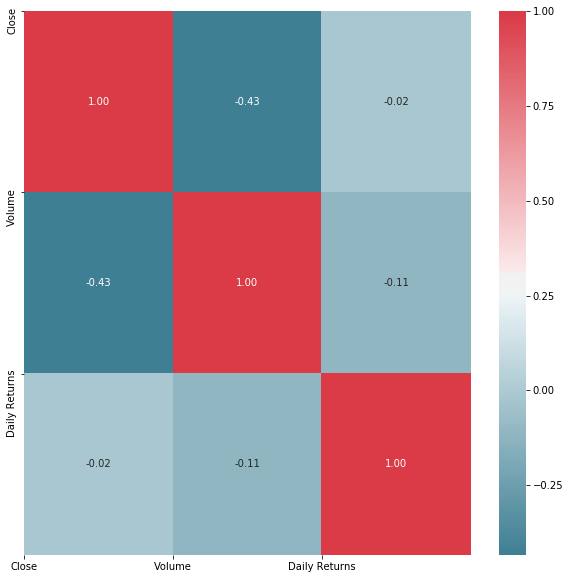

In [52]:
fb_df_cor = fb_df.loc[:, ['Close', 'Volume', 'Daily Returns']]
corr = fb_df_cor.corr()
#corr = fb_df.corr()
#corr = dfreg.corr()
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

*** 
NEXT PHASE MODELING USING FACEBOOK PROPHET
***
Source: https://facebook.github.io/prophet/docs/installation.html

In [76]:
#conda install libpython m2w64-toolchain -c msys2

In [74]:
pip install pystan
#pip install fbprophet

SyntaxError: invalid syntax (<ipython-input-74-d3be8a835cfd>, line 1)

In [77]:
from fbprophet import Prophet

In [70]:
#fb_df.dtypes

In [57]:
fb_df = fb_df.rename(columns = {'Date':'ds', 'Close' : 'y'})
fb_df.head(5)
fb_df.tail()

,ds,Open,High,Low,y,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns
Date,,,,,,,,,,,,,,,
2018-03-21,2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0,168.15,-0.007320
2018-03-22,2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0,169.39,0.027291
2018-03-23,2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0,164.89,0.034507
2018-03-26,2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0,159.39,-0.004186
2018-03-27,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0,160.06,0.051712


In [67]:
#Creating a new data frame with only the 2 columns of interest
dsy = fb_df[['ds', 'y']]
dsy

,ds,y
Date,,
2012-05-18,2012-05-18,38.2318
2012-05-21,2012-05-21,34.0300
2012-05-22,2012-05-22,31.0000
2012-05-23,2012-05-23,32.0000
2012-05-24,2012-05-24,33.0300
...,...,...
2018-03-21,2018-03-21,169.3900
2018-03-22,2018-03-22,164.8900
2018-03-23,2018-03-23,159.3900


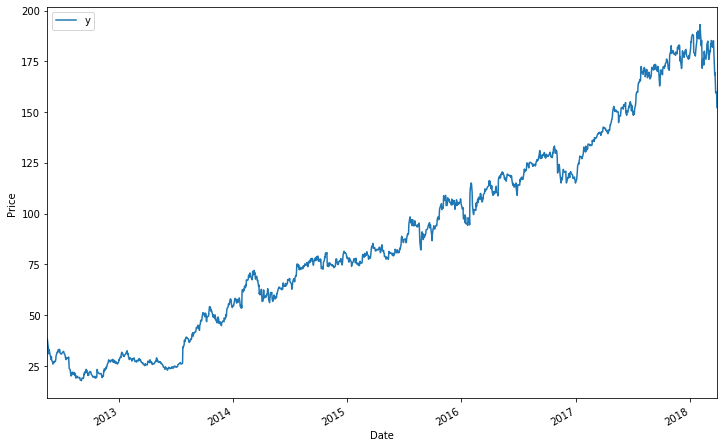

In [68]:
ax = dsy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [78]:
#Instantiating a new prophet object
my_model = Prophet(interval_width=0.95)